## This notebook is for analyzing Internal Market Relationships (Market Microstructure)

These focus on what happens inside the trading day — how traders behave, how price and volume interact, and how intraday movement reflects sentiment.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# set up notebook to show all outputs in a cell, not only last one


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Load dataset
df = pd.read_csv("../data/raw/finance_economics_dataset.csv")

# Quick look
df.head(15)

,Date,Stock Index,Open Price,Close Price,Daily High,Daily Low,Trading Volume,GDP Growth (%),Inflation Rate (%),Unemployment Rate (%),...,Forex USD/EUR,Forex USD/JPY,Crude Oil Price (USD per Barrel),Gold Price (USD per Ounce),Real Estate Index,Retail Sales (Billion USD),Bankruptcy Rate (%),Mergers & Acquisitions Deals,Venture Capital Funding (Billion USD),Consumer Spending (Billion USD)
0,2000-01-01,Dow Jones,2128.75,2138.48,2143.70,2100.55,2670411,-0.37,6.06,6.10,...,1.04,119.87,47.20,1052.34,390.23,2229,2.12,3,76.64,4589
1,2000-01-02,S&P 500,2046.82,2036.18,2082.83,2009.53,690220415,3.19,4.95,6.62,...,1.00,98.22,52.84,1957.73,346.23,4156,1.40,21,5.67,10101
2,2000-01-03,Dow Jones,1987.92,1985.26,2022.28,1978.37,315284661,5.54,9.13,2.60,...,0.83,80.13,78.80,2339.49,439.46,340,0.79,48,39.43,13665
3,2000-01-04,Dow Jones,4625.02,4660.47,4665.26,4595.46,13098297,10.00,3.77,2.20,...,0.95,149.15,28.18,1308.54,213.07,8456,4.22,16,12.83,5192
4,2000-01-05,S&P 500,1998.18,1982.18,2044.31,1966.44,385306746,1.53,2.20,8.20,...,1.43,113.71,92.20,2210.08,405.49,1596,2.21,34,86.37,10688
5,2000-01-06,S&P 500,2087.80,2124.76,2153.18,2085.18,82664194,1.42,6.08,3.24,...,1.39,140.00,60.23,2338.39,441.06,403,0.82,45,96.80,8613
6,2000-01-07,Dow Jones,4037.59,3996.40,4055.78,3948.97,653722138,7.64,6.24,4.52,...,0.92,138.80,29.30,1309.15,319.60,4874,9.55,31,32.63,1303
7,2000-01-08,NASDAQ,2798.96,2826.64,2864.47,2766.89,423890033,7.08,4.39,13.01,...,1.06,136.86,117.92,896.46,265.51,1011,7.33,37,98.89,3771
8,2000-01-09,Dow Jones,4106.84,4141.59,4154.46,4062.99,867172199,5.97,4.87,9.42,...,1.02,112.13,104.95,2358.55,479.46,5193,5.18,30,75.26,13164
9,2000-01-10,Dow Jones,1261.46,1229.64,1296.14,1195.84,174582201,1.95,9.60,10.24,...,0.90,142.71,123.15,1361.82,167.59,6147,7.43,24,0.22,13774


## Open Price VS Close Price

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Line Plot of Open Price vs Close Price')

Text(0.5, 0, 'Open Price')

Text(0, 0.5, 'Close Price')

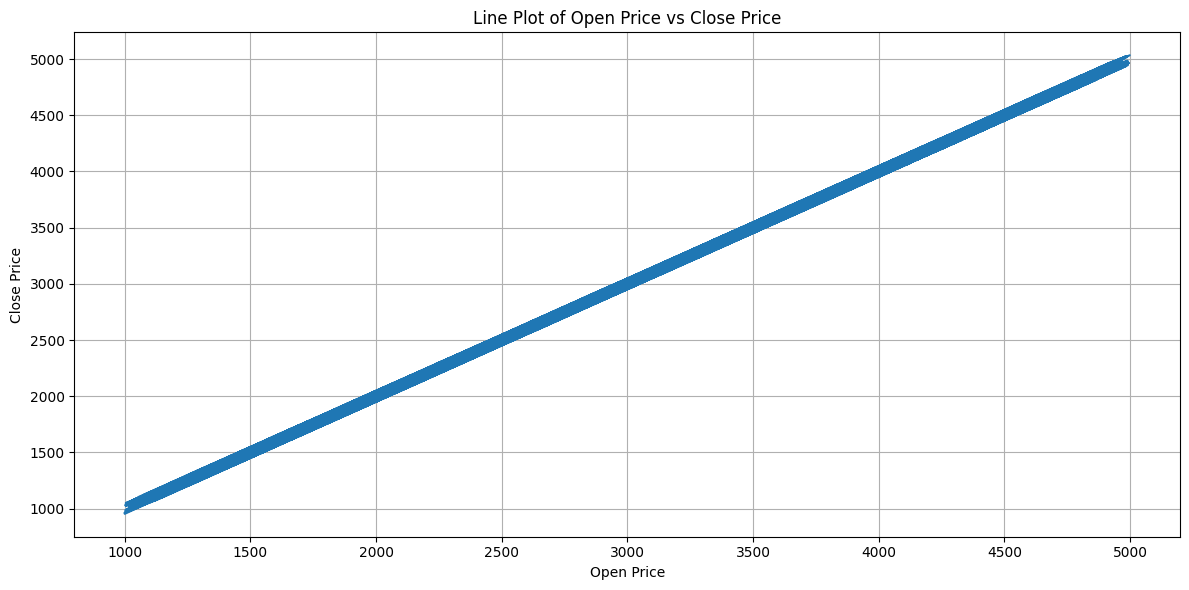

In [3]:
# Plotting a line plot of Open Price vs Close Price
plt.figure(figsize=(12, 6))
plt.plot(df['Open Price'], df['Close Price'])
plt.title('Line Plot of Open Price vs Close Price')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.grid(True)
plt.tight_layout()
plt.show()

## Daily Return (Intraday Return) VS Trading Volume

<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Intraday Return')

Text(0, 0.5, 'Trading Volume')

Text(0.5, 1.0, 'Intraday Return vs Trading Volume - Scatter Plot - Dow Jones')

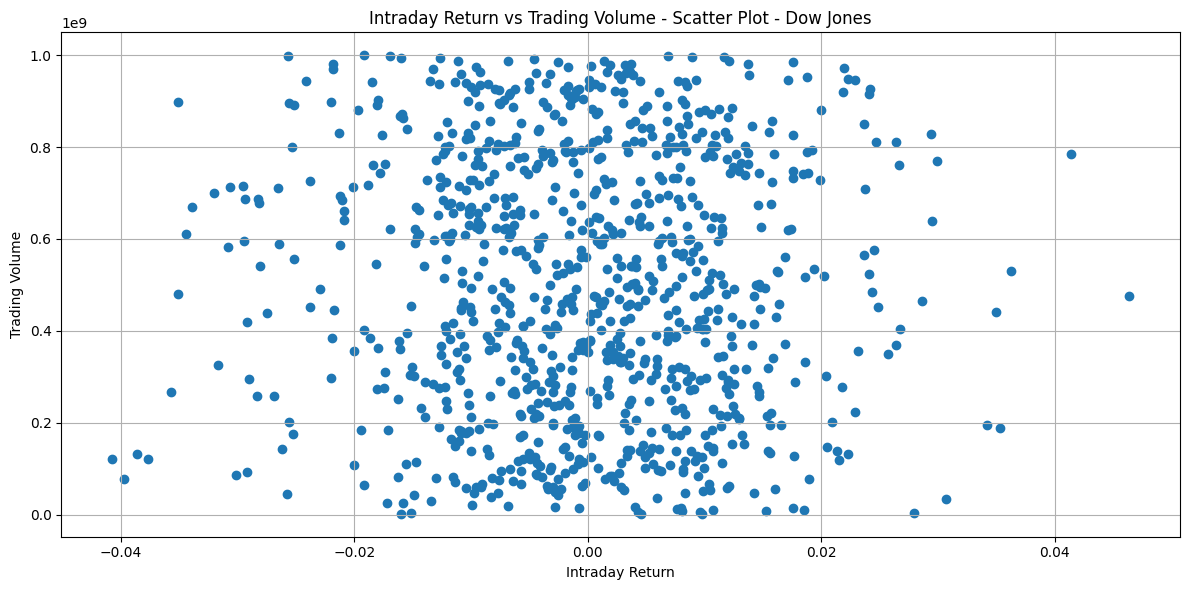

<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Intraday Return and Trading Volume - Correlation Matrix - Dow Jones')

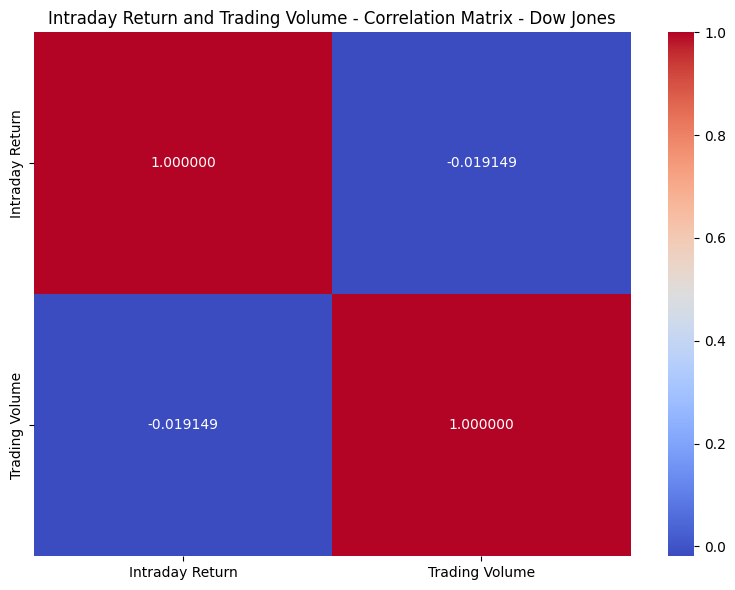

<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Intraday Return')

Text(0, 0.5, 'Trading Volume')

Text(0.5, 1.0, 'Intraday Return vs Trading Volume - Scatter Plot - S&P 500')

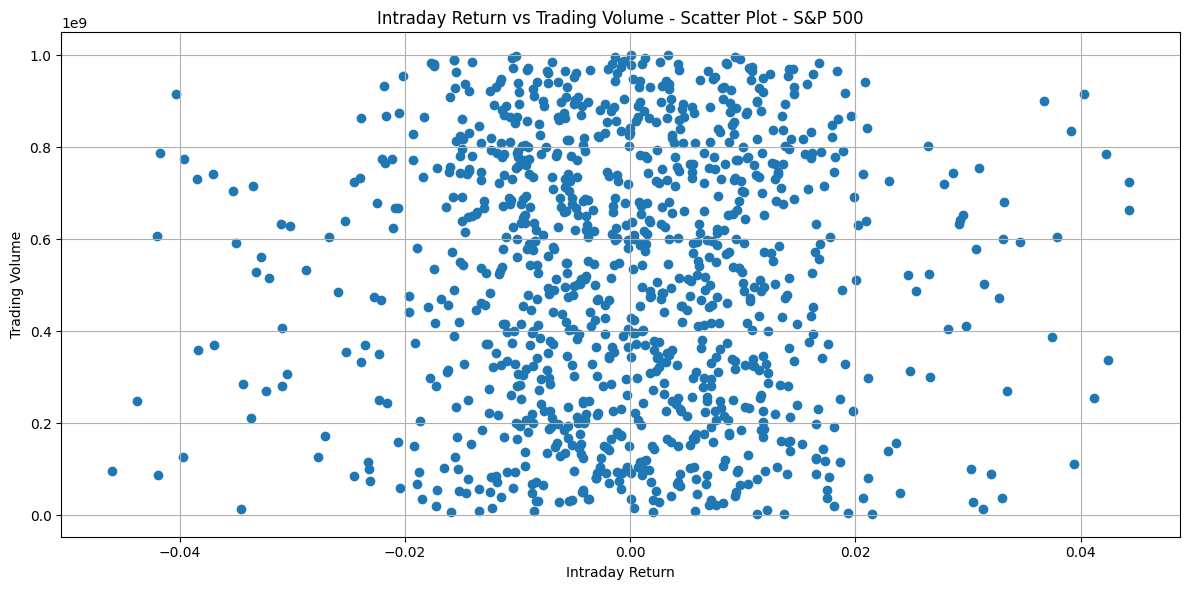

<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Intraday Return and Trading Volume - Correlation Matrix - S&P 500')

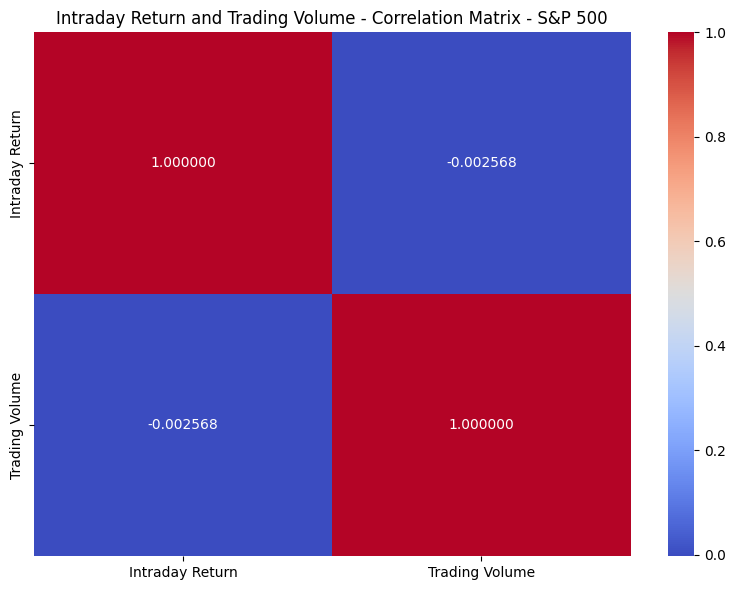

<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Intraday Return')

Text(0, 0.5, 'Trading Volume')

Text(0.5, 1.0, 'Intraday Return vs Trading Volume - Scatter Plot - NASDAQ')

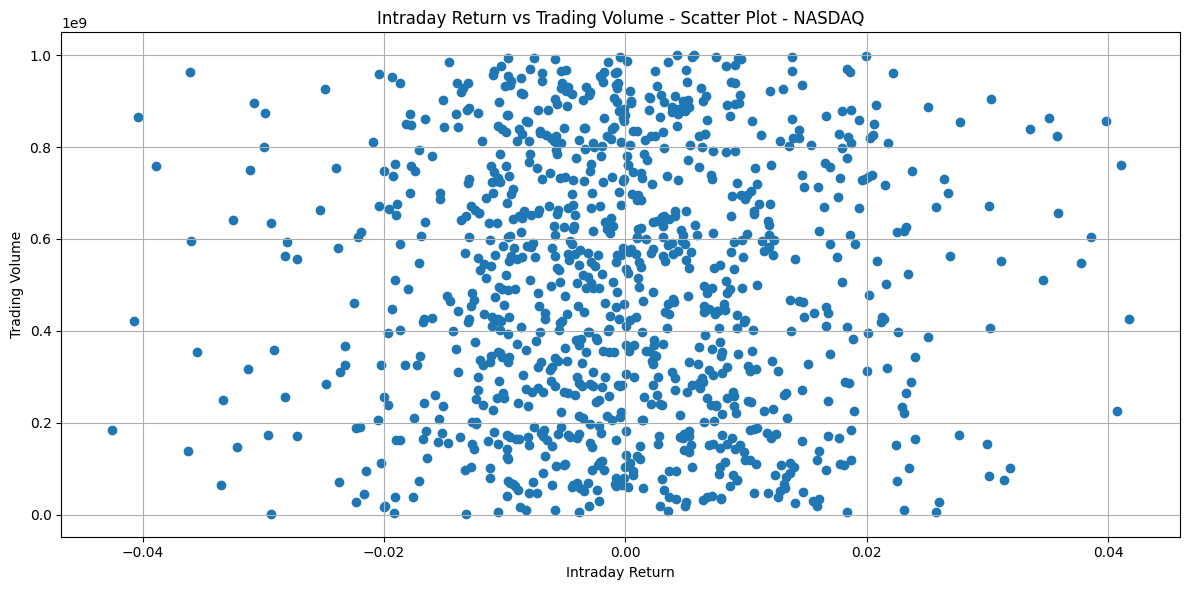

<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Intraday Return and Trading Volume - Correlation Matrix - NASDAQ')

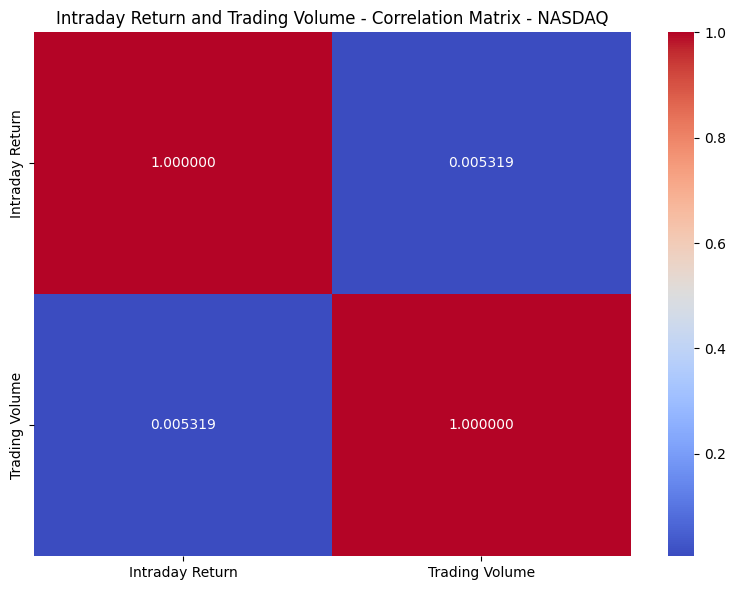

In [5]:
df['Intraday Return'] = (df['Close Price'] - df['Open Price']) / df['Open Price']

for idx in df['Stock Index'].unique():
    subset = df[df['Stock Index'] == idx]
    
    # Scatter plot of Intraday Return vs Trading Volume for each Stock Index
    plt.figure(figsize=(12, 6))
    plt.scatter(subset['Intraday Return'], subset['Trading Volume'])
    plt.xlabel("Intraday Return")
    plt.ylabel("Trading Volume")
    plt.title(f"Intraday Return vs Trading Volume - Scatter Plot - {idx}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Corelation matrix of Intraday Return vs Trading Volume for each Stock Index
    correlation_matrix = subset[['Intraday Return', 'Trading Volume']].corr()

    # Plotting the correlation matrix as a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".6f")
    plt.title(f"Intraday Return and Trading Volume - Correlation Matrix - {idx}")
    plt.tight_layout()
    plt.show()

## Volatility VS Trading Volume

### Use Daily Range as a measure of volatility
Purpose: Measures how much the market moved within a single trading day

<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Daily Range')

Text(0, 0.5, 'Trading Volume')

Text(0.5, 1.0, 'Daily Range vs Trading Volume - Scatter Plot - Dow Jones')

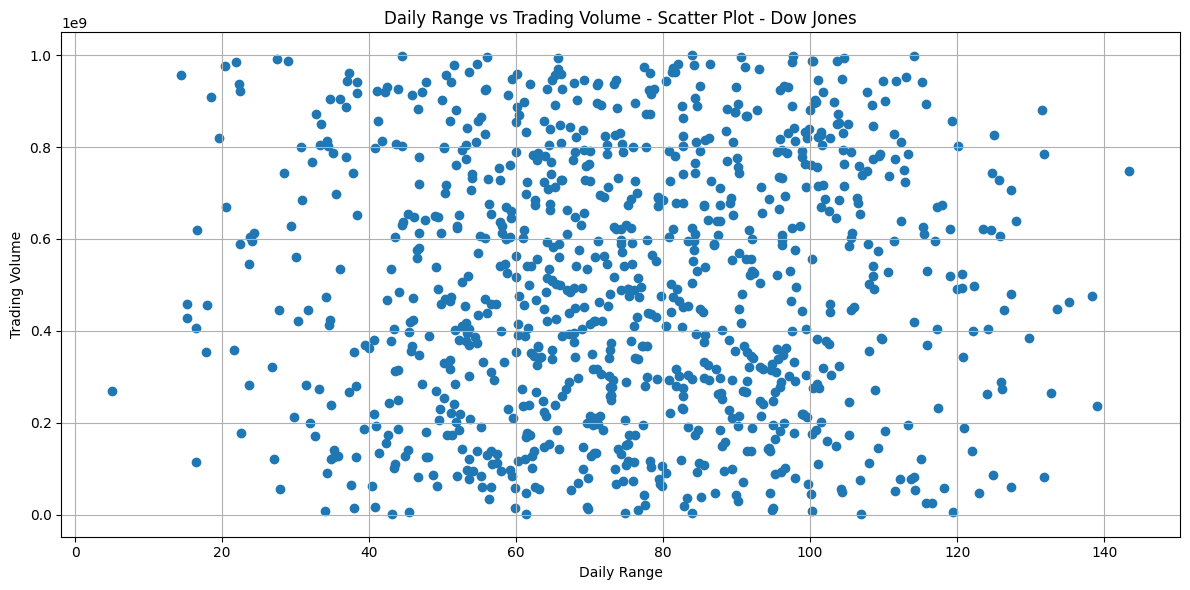

<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Daily Range and Trading Volume - Correlation Matrix - Dow Jones')

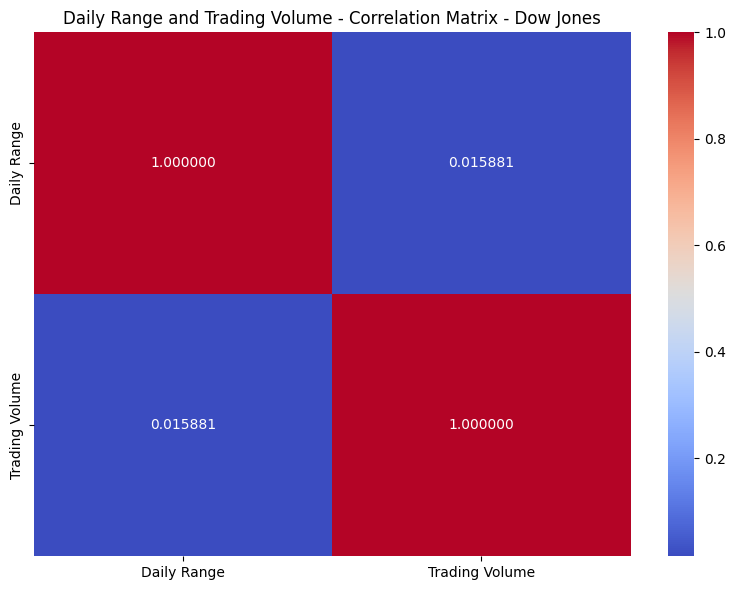

<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Daily Range')

Text(0, 0.5, 'Trading Volume')

Text(0.5, 1.0, 'Daily Range vs Trading Volume - Scatter Plot - S&P 500')

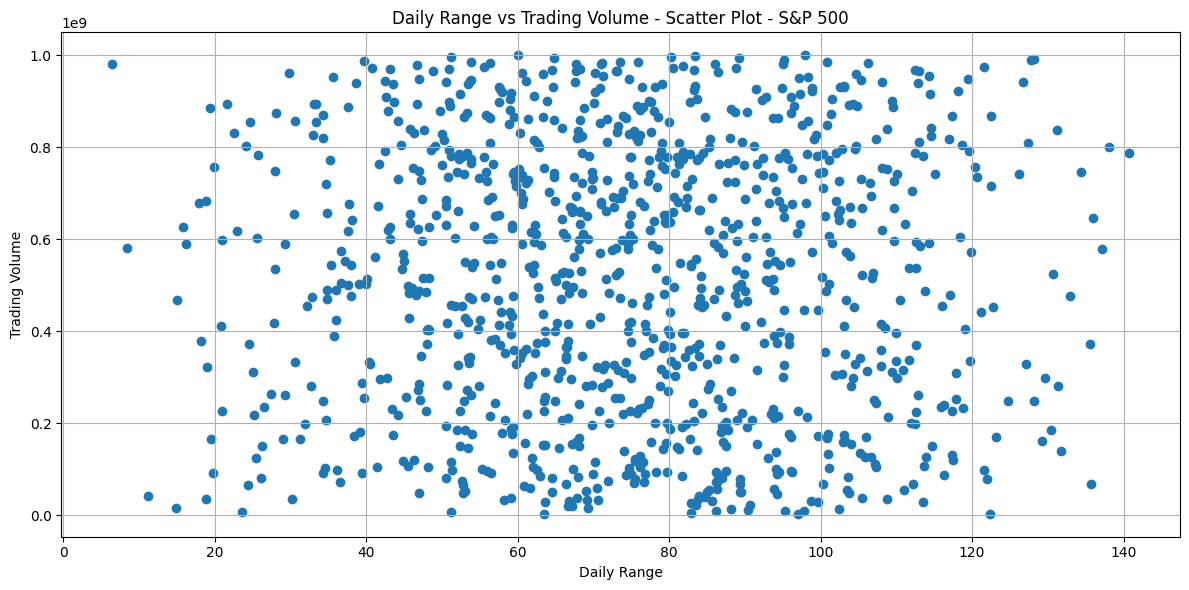

<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Daily Range and Trading Volume - Correlation Matrix - S&P 500')

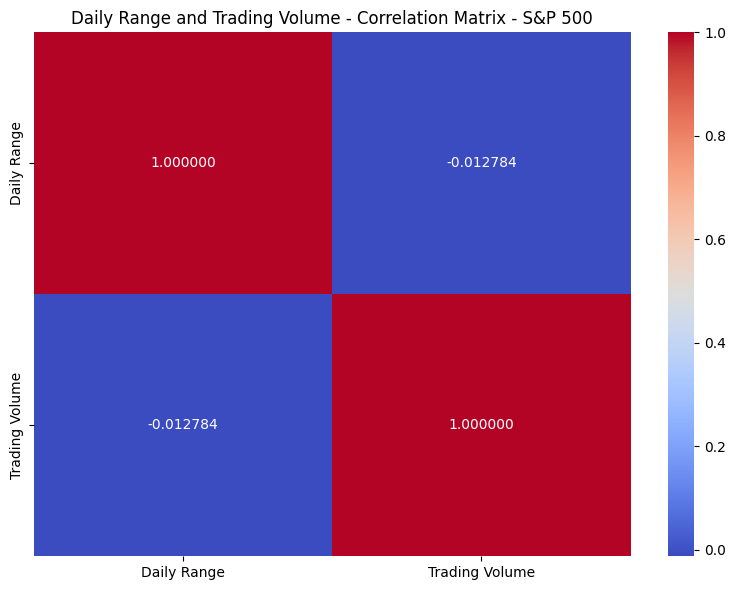

<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Daily Range')

Text(0, 0.5, 'Trading Volume')

Text(0.5, 1.0, 'Daily Range vs Trading Volume - Scatter Plot - NASDAQ')

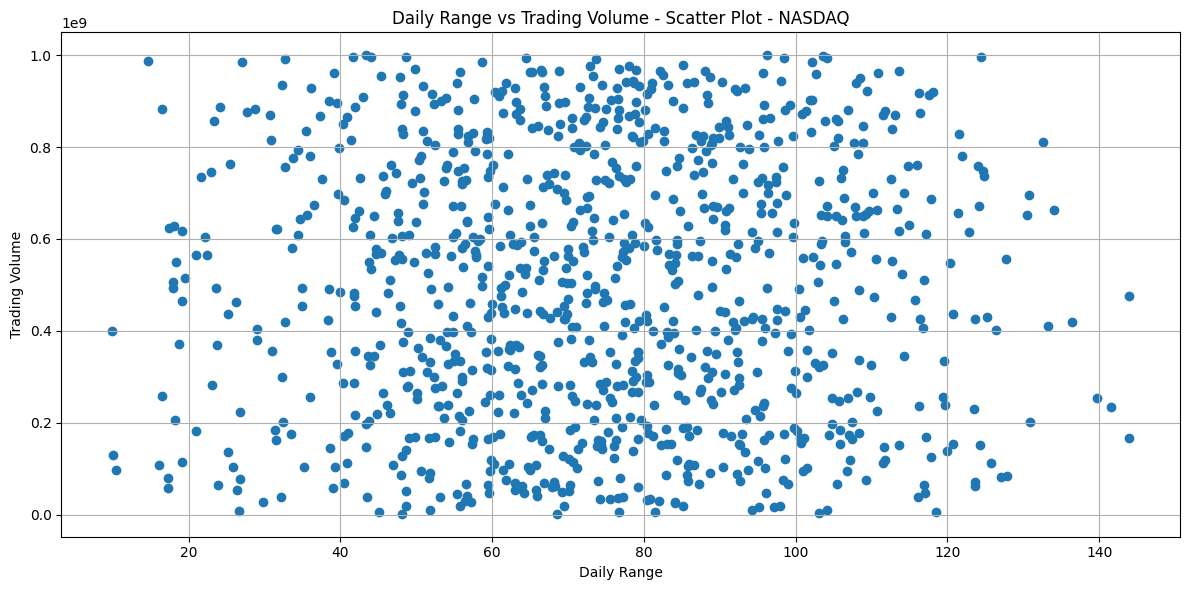

<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Daily Range and Trading Volume - Correlation Matrix - NASDAQ')

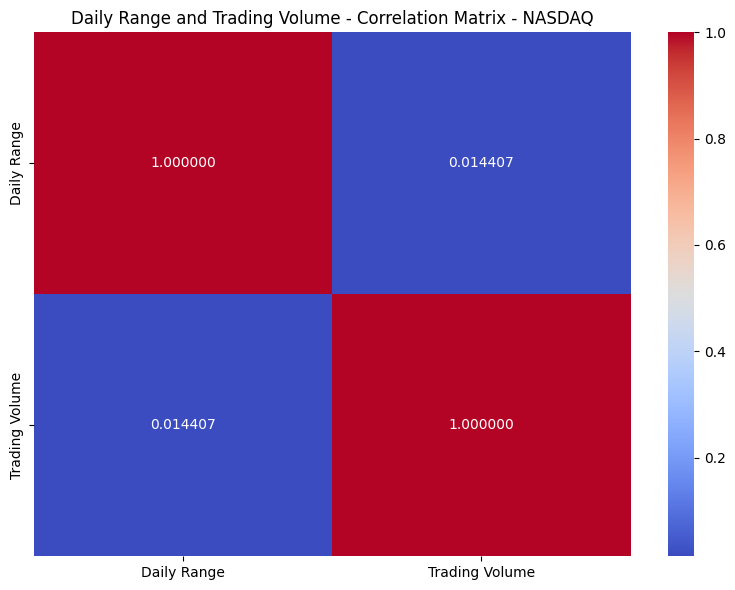

In [ ]:
# Use Daily High and Daily Low to calculate Daily Range
df['Daily Range'] = df['Daily High'] - df['Daily Low']

for idx in df['Stock Index'].unique():
    subset = df[df['Stock Index'] == idx]
    
    # Scatter plot of Raily Range vs Trading Volume for each Stock Index
    plt.figure(figsize=(12, 6))
    plt.scatter(subset['Daily Range'], subset['Trading Volume'])
    plt.xlabel("Daily Range")
    plt.ylabel("Trading Volume")
    plt.title(f"Daily Range vs Trading Volume - Scatter Plot - {idx}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Corelation matrix of Daily Range vs Trading Volume for each Stock Index
    correlation_matrix = subset[['Daily Range', 'Trading Volume']].corr()

    # Plotting the correlation matrix as a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".6f")
    plt.title(f"Daily Range and Trading Volume - Correlation Matrix - {idx}")
    plt.tight_layout()
    plt.show()

### Use Rolling Standard Deviation (true volatility) for Volatility
Purpose: Reveals investor behavior during risk cycles

<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Rolling Volatility')

Text(0, 0.5, 'Trading Volume')

Text(0.5, 1.0, 'Rolling Volatility vs Trading Volume - Scatter Plot - Dow Jones')

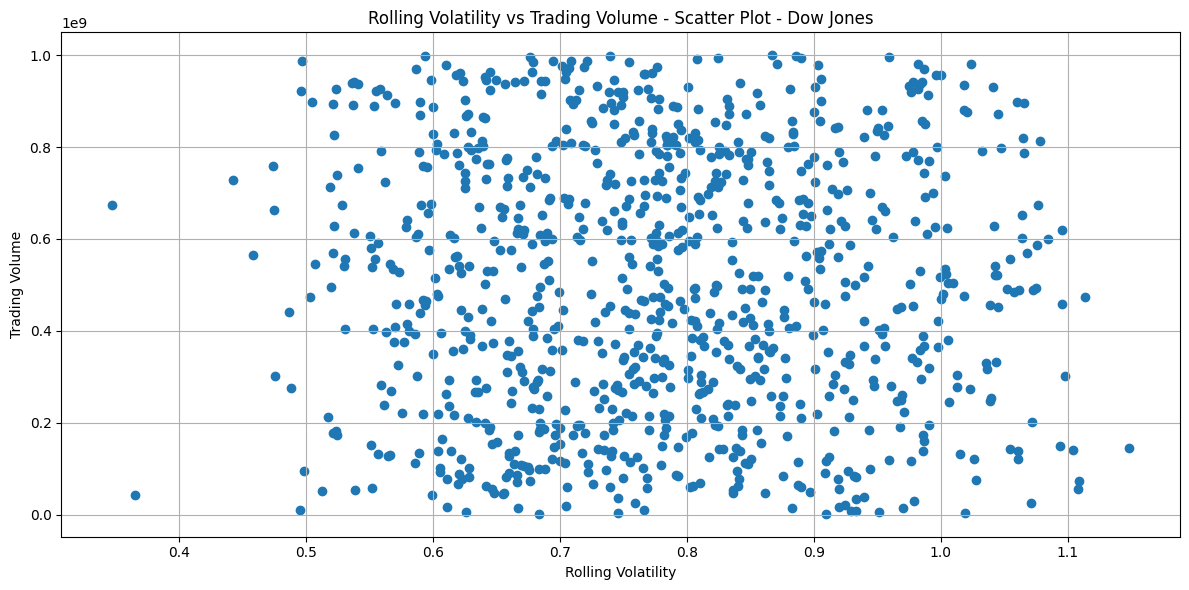

<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Rolling Volatility and Trading Volume - Correlation Matrix - Dow Jones')

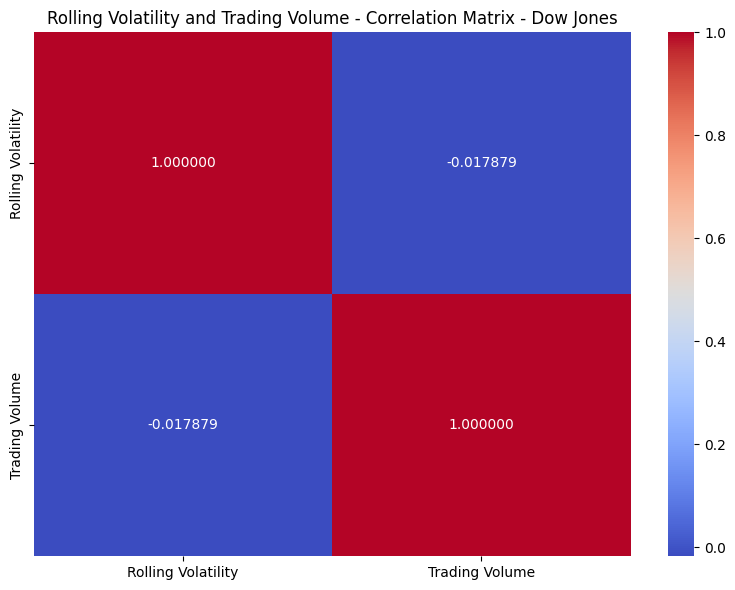

<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Rolling Volatility')

Text(0, 0.5, 'Trading Volume')

Text(0.5, 1.0, 'Rolling Volatility vs Trading Volume - Scatter Plot - S&P 500')

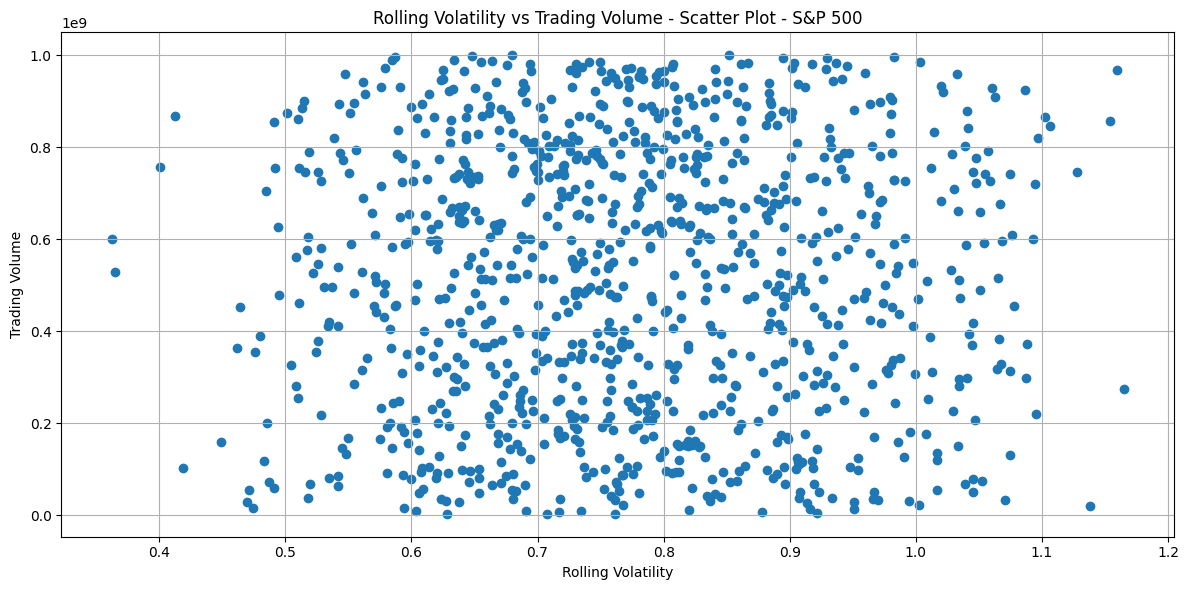

<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Rolling Volatility and Trading Volume - Correlation Matrix - S&P 500')

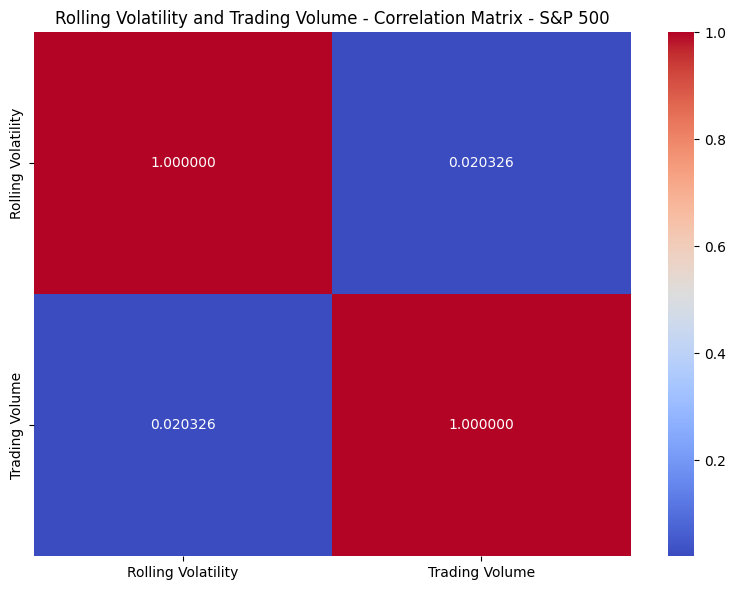

<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Rolling Volatility')

Text(0, 0.5, 'Trading Volume')

Text(0.5, 1.0, 'Rolling Volatility vs Trading Volume - Scatter Plot - NASDAQ')

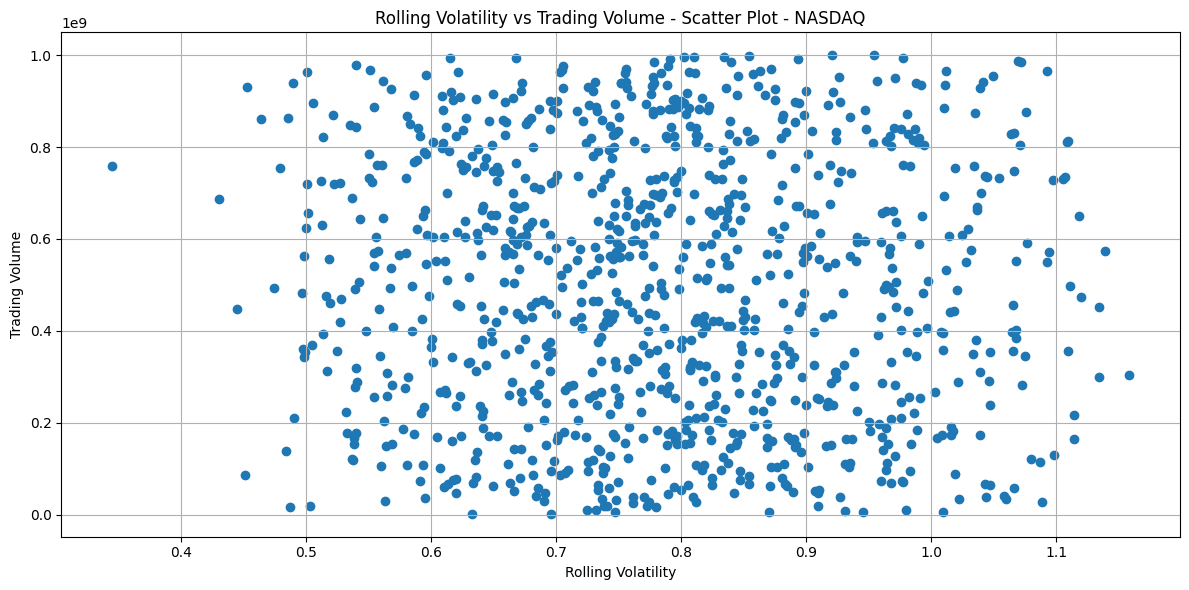

<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Rolling Volatility and Trading Volume - Correlation Matrix - NASDAQ')

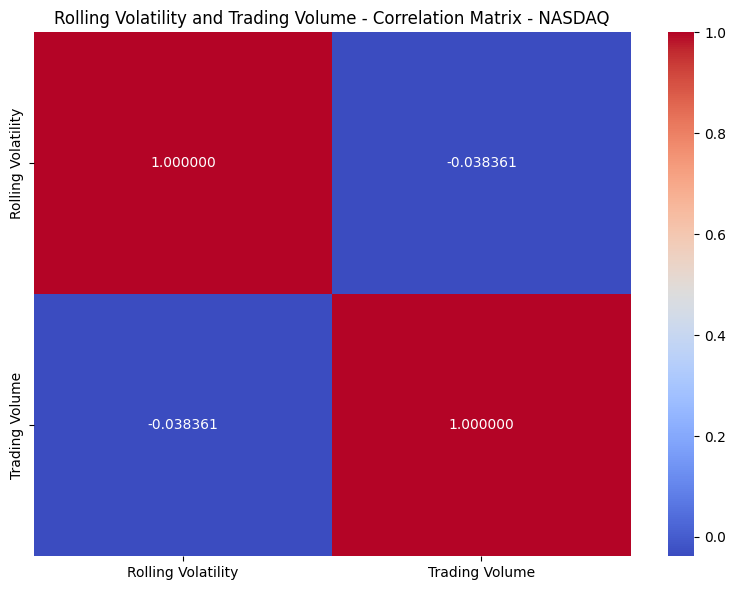

In [7]:
df['Daily Return'] = df['Close Price'].pct_change()
df['Rolling Volatility'] = df['Daily Return'].rolling(window=30).std()
for idx in df['Stock Index'].unique():
    subset = df[df['Stock Index'] == idx]
    
    # Scatter plot of Rolling Volatility vs Trading Volume for each Stock Index
    plt.figure(figsize=(12, 6))
    plt.scatter(subset['Rolling Volatility'], subset['Trading Volume'])
    plt.xlabel("Rolling Volatility")
    plt.ylabel("Trading Volume")
    plt.title(f"Rolling Volatility vs Trading Volume - Scatter Plot - {idx}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Corelation matrix of Rolling Volatility vs Trading Volume for each Stock Index
    correlation_matrix = subset[['Rolling Volatility', 'Trading Volume']].corr()

    # Plotting the correlation matrix as a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".6f")
    plt.title(f"Rolling Volatility and Trading Volume - Correlation Matrix - {idx}")
    plt.tight_layout()
    plt.show()